### Papers 

- [Predicting the properties of black holes merger remnants with Deep Neural Networks](https://arxiv.org/abs/1911.01496)
- [The SXS Collaboration catalog of binary black hole simulations](https://arxiv.org/abs/1904.04831)
- [Deep Learning for Real-time Gravitational Wave Detection and Parameter Estimation: Results with Advanced LIGO Data](https://arxiv.org/abs/1711.03121)

- NEW ONE: [GWTC-3: Compact Binary Coalescences Observed by LIGO and Virgo During the Second Part of the Third Observing Run](https://arxiv.org/abs/2111.03606)

### Other Links 

- [SXS Collaboration catalog](https://data.black-holes.org/waveforms/index.html)
- [Github repo of SXS Collaboration catalog](https://github.com/sxs-collaboration/catalog_tools)
- [Rit catalog](https://ccrg.rit.edu/content/data/rit-waveform-catalog)
- [lal simulation](https://lscsoft.docs.ligo.org/lalsuite/lalsimulation/classlalsimulation_1_1nrfits_1_1_n_r_sur7dq4_remnant_1_1_n_r_sur7dq4_remnant.html)
- [Visualizations](https://vijayvarma392.github.io/SurrogateMovie)


In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import ensemble
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Input data: LIGO
This is the datafile obtained with preprocessing code

In [3]:
df_ok = pd.read_csv('/Users/camilaburne/UT/Data Mining/Data-Mining-ECE-280/LIGO/df_predictors.csv')
df_ok.columns

Index(['Unnamed: 0', 'alternative_names', 'reference_mass_ratio',
       'reference_dimensionless_spin1', 'reference_dimensionless_spin2',
       'remnant_mass', 'remnant_dimensionless_spin', 'keyword1', 'keyword2',
       'keyword3', 'reference_chi_eff', 'reference_chi1_perp',
       'reference_chi2_perp', 'reference_mass1', 'reference_mass2',
       'reference_dimensionless_spin1_1', 'reference_dimensionless_spin1_2',
       'reference_dimensionless_spin1_3', 'reference_dimensionless_spin2_1',
       'reference_dimensionless_spin2_2', 'reference_dimensionless_spin2_3',
       'remnant_dimensionless_spin_1', 'remnant_dimensionless_spin_2',
       'remnant_dimensionless_spin_3', 'precessing', 'notspinning', 's1', 's2',
       'eta', 's1_sum', 's2_sum', 's3_sum', 'm1+m2', 'seff'],
      dtype='object')

### Input data: Virgo 


Note: we have to delete (or not...) two obs that are neutron stars: 
In addition to GW200115 042309 and GW200105 162426, the O3b candidates include GW191219 163120 that is consistent with originating from a NSBH, and GW200210 092254 that could either be from a NSBH or a binary black hole (BBH)

In [4]:
virgo = pd.read_csv('GWTC.csv')

In [5]:
print("rows before cleaning:", virgo.shape[0])
virgo = virgo.loc[virgo.final_mass_source.isnull()==False,] 
virgo = virgo.loc[virgo.total_mass_source.isnull()==False,]
print("rows after cleaning: ", virgo.shape[0])

rows before cleaning: 93
rows after cleaning:  80


### Renaming cols to match LIGO names

In [6]:
virgo.columns

Index(['id', 'commonName', 'version', 'catalog.shortName', 'GPS', 'reference',
       'jsonurl', 'mass_1_source', 'mass_1_source_lower',
       'mass_1_source_upper', 'mass_2_source', 'mass_2_source_lower',
       'mass_2_source_upper', 'network_matched_filter_snr',
       'network_matched_filter_snr_lower', 'network_matched_filter_snr_upper',
       'luminosity_distance', 'luminosity_distance_lower',
       'luminosity_distance_upper', 'chi_eff', 'chi_eff_lower',
       'chi_eff_upper', 'total_mass_source', 'total_mass_source_lower',
       'total_mass_source_upper', 'chirp_mass_source',
       'chirp_mass_source_lower', 'chirp_mass_source_upper', 'chirp_mass',
       'chirp_mass_lower', 'chirp_mass_upper', 'redshift', 'redshift_lower',
       'redshift_upper', 'far', 'far_lower', 'far_upper', 'final_mass_source',
       'final_mass_source_lower', 'final_mass_source_upper'],
      dtype='object')

In [7]:
virgo = virgo.rename(columns={'mass_1_source':'reference_mass1', 
                      'mass_2_source':'reference_mass2',
                      'chi_eff': 'reference_chi_eff',
                      'final_mass_source':'remnant_mass'})

### Feature engineering Virgo

In [8]:
virgo['reference_mass_ratio'] = virgo.reference_mass2 / virgo.reference_mass1
virgo['eta']  = virgo['reference_mass_ratio'] / (virgo['reference_mass_ratio']+1)**2
virgo['remnant_mass'] = virgo.remnant_mass / virgo.total_mass_source



See the distribution of all the variables used in the model (just 2, and the final mass) 

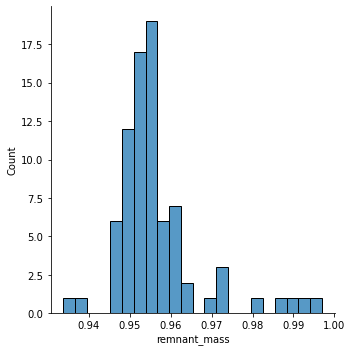

In [9]:
sns.displot(virgo['remnant_mass'])
plt.show()

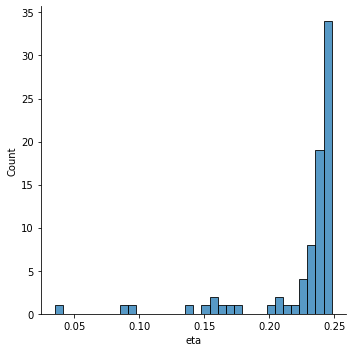

In [10]:
sns.displot(virgo['eta'])
plt.show()

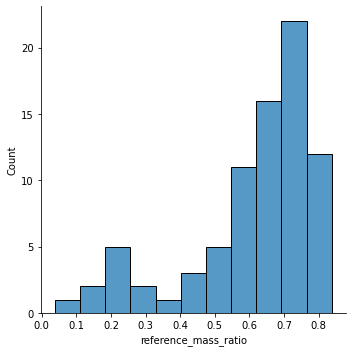

In [11]:
sns.displot(virgo['reference_mass_ratio'])
plt.show()

### Train test split for the LIGO data
And also just renaming VIRGO in X_virgo and y_virgo

In [12]:
# Random sampling
# Variables not used 'reference_mass_ratio', reference_mass1','reference_mass2'

X = df_ok[['reference_chi_eff','eta']]
y = df_ok['remnant_mass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,  random_state=0)

In [13]:
X_virgo = virgo[['reference_chi_eff','eta']]
y_virgo = virgo['remnant_mass']

### Building a new model with LIGO data and very few variables 

In [14]:
params = {'learning_rate': 0.03,
             'max_depth': 4,
             'min_samples_split': 5,
             'n_estimators': 600}


boostreg = ensemble.GradientBoostingRegressor(**params)
br1 = boostreg.fit(X_train, y_train)
pred = br1.predict(X_test)
print('Test error')
print(mean_squared_error(y_test, pred))


Test error
3.579633438543198e-06


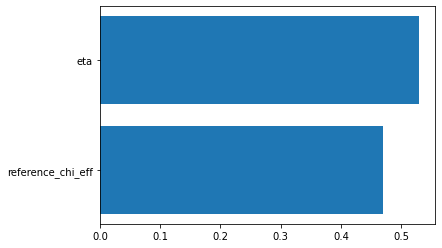

In [15]:
plt.barh(X_train.columns,br1.feature_importances_)
plt.show()

### Virgo data prediction

In [16]:
pred = br1.predict(X_virgo)

In [17]:
pred = br1.predict(X_virgo)
mean_squared_error(y_virgo, pred)


1.1167990109717995e-05

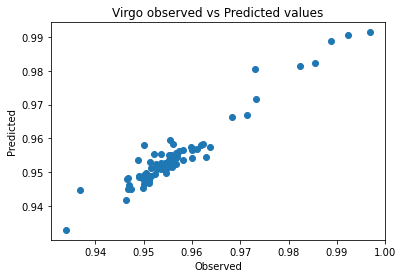

In [18]:
plt.scatter(y_virgo,pred)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Virgo observed vs Predicted values')
plt.show()

### Training data for comparison

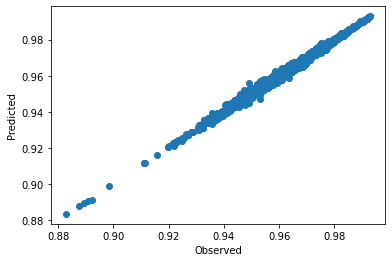

In [19]:
pred = br1.predict(X_train)
mean_squared_error(y_train, pred)

plt.scatter(y_train,pred)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()